In [ ]:
# Import necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:

# Load the MNIST dataset (8x8 images flattened into 64 features)
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Print dataset shape
print("MNIST Dataset Shape:", X.shape)  # (1797, 64) -> 1797 images, 64 pixel features


MNIST Dataset Shape: (1797, 64)


In [3]:

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1437, 64)
Testing set shape: (360, 64)


In [4]:

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred = rf_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classification Accuracy: {accuracy:.4f}")


Random Forest Classification Accuracy: 0.9611


In [5]:

# Compute confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[35  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  1  0  0  0  0]
 [ 1  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  2 30  0]
 [ 0  0  0  1  0  0  0  1  1 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.90      0.97      0.93        36
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       0.97      0.97      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.97      0.92      0.94        36

    accuracy                  

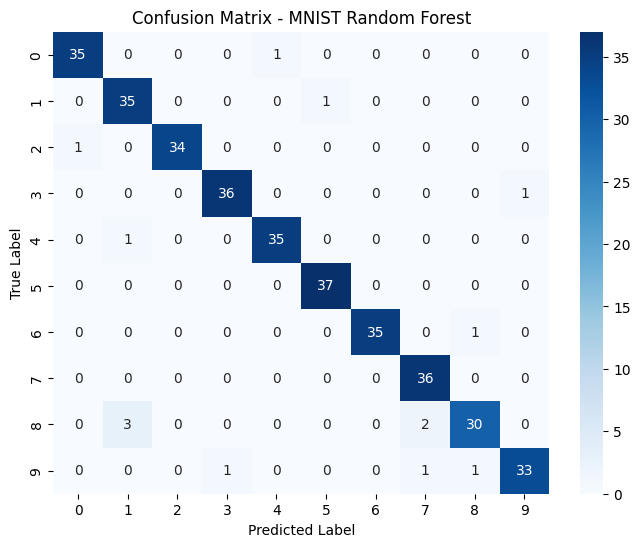

In [6]:

# Visualize Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MNIST Random Forest")
plt.show()


In [7]:

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters (Random Forest):", grid_search.best_params_)


Best Parameters (Random Forest): {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}


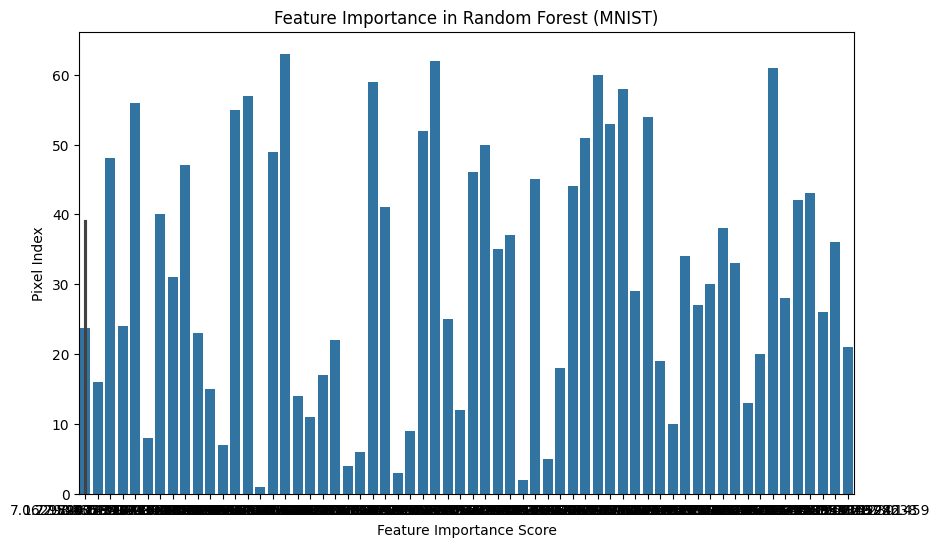

In [8]:

# Plot Feature Importance
plt.figure(figsize=(10,6))
importance = best_rf.feature_importances_
sns.barplot(x=importance, y=np.arange(len(importance)))
plt.xlabel("Feature Importance Score")
plt.ylabel("Pixel Index")
plt.title("Feature Importance in Random Forest (MNIST)")
plt.show()


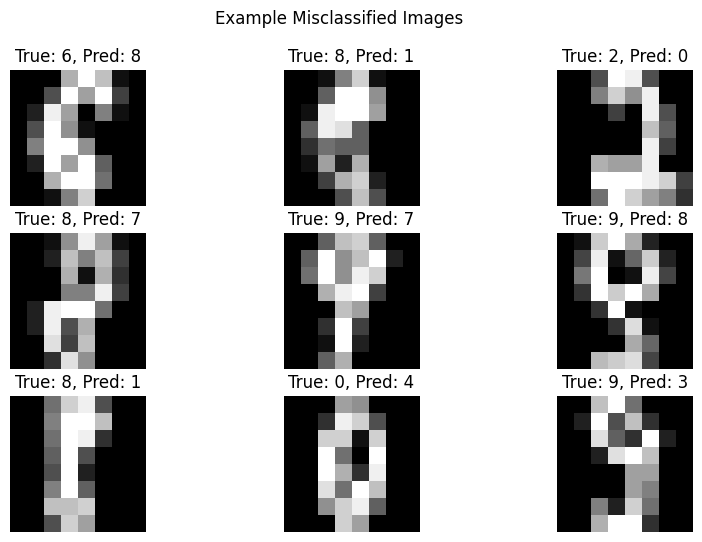

In [9]:

# Identify misclassified images
misclassified = np.where(y_test != y_pred)[0]

# Plot a few misclassified images
plt.figure(figsize=(10,6))
for i, idx in enumerate(misclassified[:9]):  # Show 9 misclassified images
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx].reshape(8,8), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle("Example Misclassified Images")
plt.show()
